
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices




## Getting Started
In this project, I will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.head()

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
In this first section of this project, I will make a cursory investigation about the Boston housing data and provide your observations.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [4]:
# TODO: Minimum price of the data
minimum_price = data["MEDV"].min()

# TODO: Maximum price of the data
maximum_price = data["MEDV"].max()

# TODO: Mean price of the data
counts = data["MEDV"].count()
sum = data["MEDV"].sum()
mean_price = float(sum/counts)

# TODO: Median price of the data
#X=data.as_matrix(columns=[df[1:]])
#print(prices)
 
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))
data.head()

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266784


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`?

### Answer Belew:

1) Home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?

In [5]:
rm = data["RM"]
if rm[0] > rm[1]:
    if prices[0] > prices[1]:
        print("Home that has an 'RM' value(number of rooms) of 1st home be worth more than a home that has an 'RM' value of 2nd home")
    else:
        print("Home that has an 'RM' value(number of rooms) of 1st home be worth less than a home that has an 'RM' value of 2nd home")

Home that has an 'RM' value(number of rooms) of 1st home be worth more than a home that has an 'RM' value of 2nd home


2) Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?

In [6]:
rl = data["LSTAT"]
if rl[0] > rl[1]:
    if prices[0] > prices[1]:
        print("Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 1st one have home prices be worth more than a neighborhood that has an 'LSTAT' value of 2nd one")
    else:
        print("Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'LSTAT' value of 2nd one")
elif rl[1] > rl[0]:
    if prices[1] > prices[0]:
        print("Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 1st one have home prices be worth more than a neighborhood that has an 'LSTAT' value of 2nd one")
    else:
        print("Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'LSTAT' value of 2nd one")        

Neighborhood that has an 'LSTAT' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'LSTAT' value of 2nd one


3) Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

In [7]:
rl = data["PTRATIO"]
if rl[0] > rl[1]:
    if prices[0] > prices[1]:
        print("Neighborhood that has an ''PTRATIO' value(percent of lower class workers) of 1st one have home prices be worth more than a neighborhood that has an 'PTRATIO' value of 2nd one")
    else:
        print("Neighborhood that has an ''PTRATIO' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'PTRATIO' value of 2nd one")
elif rl[1] > rl[0]:
    if prices[1] > prices[0]:
        print("Neighborhood that has an ''PTRATIO' value(percent of lower class workers) of 1st one have home prices be worth more than a neighborhood that has an 'PTRATIO' value of 2nd one")
    else:
        print("Neighborhood that has an ''PTRATIO' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'PTRATIO' value of 2nd one")        

Neighborhood that has an ''PTRATIO' value(percent of lower class workers) of 1st one have home prices be worth less than a neighborhood that has an 'PTRATIO' value of 2nd one


Hence looking all three explainations Using intuition, for each of the three features above, I think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' for "RM" and decrease in the value of 'MEDV' for "LSTAT" and "PTRATIO".

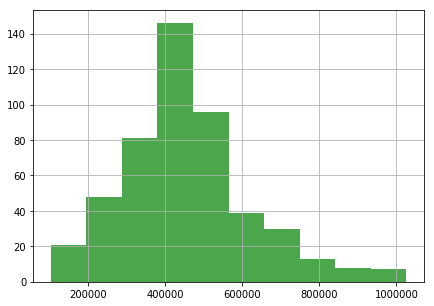

In [8]:
data['MEDV'].hist(figsize=(7,5), color='green', alpha=0.7)

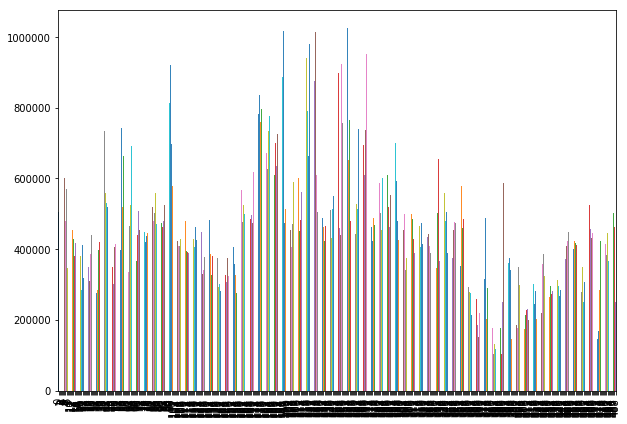

In [9]:
data['MEDV'].plot(kind='bar', alpha=0.9, figsize=(10,7))

----

## Developing a Model
In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in our predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will be calculating the [*coefficient of determination*], R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._



In [10]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [11]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Question: Would you consider this model to have successfully captured the variation of the target variable? 
 Why or why not?

**Answer:**
R2 score of 0.923 means the dependent variable can be predicted from the independent variable approximatlly.

Model to have successfully captured the variation of the target variable up to some extent. Becouse R2 score of 0.923 means that 92.3 percent of the variance in Prediction is predictable from True Value.

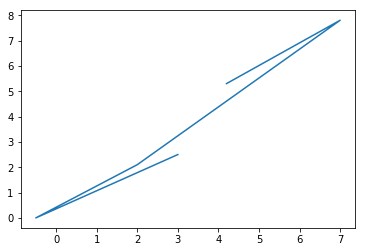

In [12]:
x= (3, -0.5, 2, 7, 4.2)
y=(2.5, 0.0, 2.1, 7.8, 5.3)
plt.plot(x,y)

### Implementation: Shuffle and Split Data
My next implementation requires that i took the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.


In [39]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state =50)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?


We can split the dataset into two pieces so that the model can be trained and tested on different data.
Then, testing accuracy is a better estimate than training accuracy of out-of-sample performance.
It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.
Testing accuracy can change a lot depending on a which observation happen to be in the testing set.
Hence we've to use k-fold cross-validation to solve this problem.
But, maximizing training accuracy rewards overly complex models that overfit the training data.
As you add more features, you can slowly reach a 100% accuracy but you are not able to generalize well.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

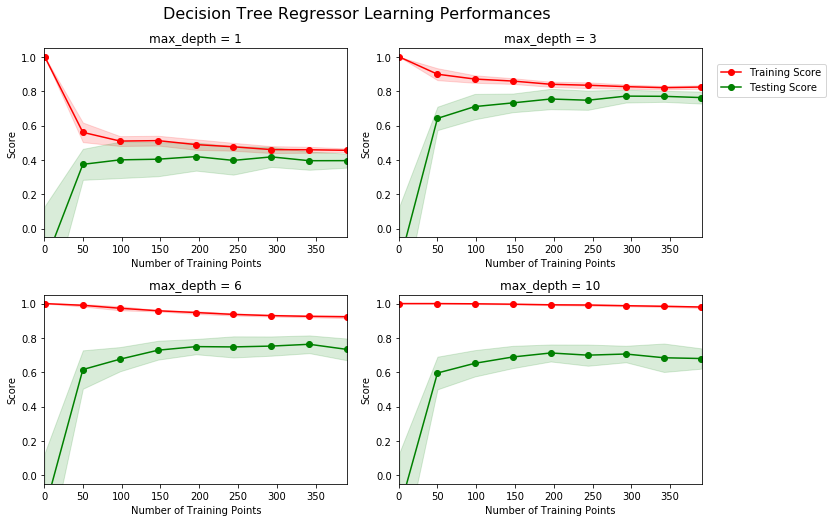

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 


Case 1

max_depth = 1 
High Bias 
Testing score (green line) increases with the number of observations.But the testing score only increases to approximately 0.4 score. This indicates how the model does not generalize well for data.
Training score (red line) decreases with the number of observations. Also the training score decreases to a score of approximately 0.4.
This indicates how the model does not seem to fit the data well.
We can say this model is facing a high bias problem. Consequently, having more training points would not benefit the model as the model is underfitting the dataset. Have to increase the model complexity to better fit the dataset.
Tetsing score has reached a limit so suggesting the model may not improve from adding more training points.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

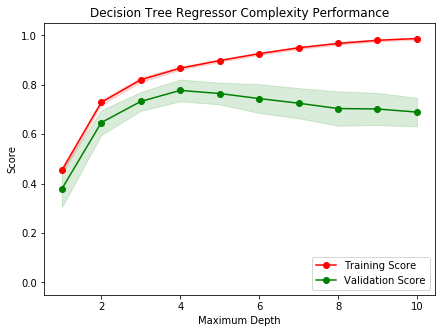

In [15]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?



**Answer:**
For knowing whether the model is suffering from a high bias or a high variance.
High variance models have a gap between the training and cross validation scores.
This is because it is able to fit the model well but unable to generalize well resulting in a high training score but low cross validation score.
High bias models have a small or no gap between the training and cross validations scores.
It is unable to fit the model well and unable to generalize well resulting in both scores converging to a similar way.

Maximum depth of 1: High Bias
Both training and testing scores are low.
There is small gap between the training and testing scores.
This indicates the model is not fitting the dataset well and not generalizing well hence the model is suffering from high bias.

Maximum depth of 10: High Variance
Training score is high. Testing score is low
There is a sufficient gap between the training and testing scores.
This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance.


### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?


The maximum depth of 4.
The training score seems to plateau here, indicating the highest possible score for the model's ability to generalize to unseen data.
Gap between the training score and testing score does not seem to be substantial too, indicating that the model may not be suffering from a high variance scenario.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?



**Answer:**
In essence, the grid search technique allows one to define a grid of parameters that will be searched using K-fold cross-validation.
Importantly, the grid search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model.
One can then find the highest cross-validation accuracy that matches with the corresponding parameters that optimizes the learning algorithm

Using GridSearchCV, it may be computationally expensive for a bigger dataset.
There are other techniques that could be used for hyperparameter optimization in order to save time like RandomizedSearchCV, in this case instead of exploring the whole parameter space just a fixed number of parameter settings is sampled from the specified distributions.
This proves useful when we need to save time but is not necessary in cases in cases like ours where the data set is relatively small.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?



K-fold cross-validation summary:
Dataset is split into K "folds" of equal size.
Each fold acts as the testing set 1 time, and acts as the training set K-1 times.
Average testing performance is used as the estimate of out-of-sample performance.
Also known as cross-validated performance.
Benefits of k-fold cross-validation:
More reliable estimate of out-of-sample performance than train/test split.
Reduce the variance of a single trial of a train/test split.
Hence, with the benefits of k-fold cross-validation, we're able to use the average testing accuracy as a benchmark to decide which is the most optimal set of parameters for the learning algorithm.
If we do not use a cross-validation set and we run grid-search, we would have different sets of optimal parameters due to the fact that without a cross-validation set, the estimate of out-of-sample performance would have a high variance.
In summary, without k-fold cross-validation the risk is higher that grid search will select hyper-parameter value combinations that perform very well on a specific train-test split but poorly otherwise.

### Implementation: Fitting a Model
My final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, My implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.



In [42]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.grid_search import GridSearchCV 

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=50)
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    # list(range(1,11)) because range(1,11) was throwing error
    # https://stackoverflow.com/questions/45444953/parameter-values-for-parameter-n-estimators-need-to-be-a-sequence
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [43]:
# Fit the training data to the model using grid search
#reg = fit_model(X_train, y_train)
reg = fit_model(X_train, y_train)


# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.



The answer for 'max_depth' for optimial model is 4, In question I guessed as it is 4 but it looks nice to find out the answer and compare it.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 



In [44]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $404,911.11
Predicted selling price for Client 2's home: $212,223.53
Predicted selling price for Client 3's home: $938,053.85


In [45]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Predicted selling price for Client 1's home: $404,911.11 which is closer to the mean price.

Predicted selling price for Client 2's home: $212,223.53, which is little low compare to client 1.

Predicted selling price for Client 3's home: $938,053.85, which is significant.**Answer: **

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [46]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  



Data collected from a rural city may not be applicable as the demographics would change and other features may be better able to fit the dataset instead of a model with features that was learned using urban data.
The learning algorithm learned from a very old dataset that may not be relevant because demographics have changed a lot since 1978.
There are only 3 features currently, there are more features that can be included such as crime rates, nearby to city, public transport access and more.